# IMPORTING NECESSARY PACKAGES

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam,Adagrad,SGD,RMSprop
import cv2
import matplotlib.pyplot as plt

# Deep Neural Network

In [3]:
obj_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = obj_mnist.load_data()

# IMAGE SIZE AND REPRESENTATION

(28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  

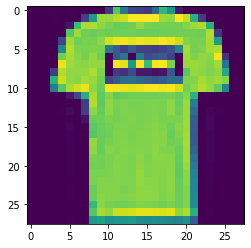

In [16]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])
print(train_images[1].shape)
print(train_images[1])

# NORMALIZING THE PIXEL VALUES OF IMAGES

In [7]:
train_images1 = train_images/255
test_images1 = test_images/255

# ANN MODEL

In [20]:
model = Sequential()
model.add(Flatten())
model.add(Dense(units = 120,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 80,activation = 'relu'))
model.add(Dense(units = 10,activation = 'softmax'))
model.compile(opt = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ["accuracy"])

In [21]:
model1_log = model.fit(train_images1,train_labels,epochs=100,batch_size=512,
                       validation_data=(test_images1.reshape(-1,28,28,1),test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 25s 409us/sample - loss: 0.7910 - accuracy: 0.7185 - val_loss: 0.5814 - val_accuracy: 0.7944
Epoch 2/100
60000/60000 [==============================] - 10s 168us/sample - loss: 0.4906 - accuracy: 0.8217 - val_loss: 0.5052 - val_accuracy: 0.8194
Epoch 3/100
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4279 - accuracy: 0.8434 - val_loss: 0.4735 - val_accuracy: 0.8253
Epoch 4/100
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3911 - accuracy: 0.8560 - val_loss: 0.4670 - val_accuracy: 0.8297
Epoch 5/100
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3665 - accuracy: 0.8641 - val_loss: 0.4290 - val_accuracy: 0.8442
Epoch 6/100
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3407 - accuracy: 0.8735 - val_loss: 0.4372 - val_accuracy: 0.8352
Epoch 7/100
60000/60000 [===============

60000/60000 [==============================] - 9s 157us/sample - loss: 0.1085 - accuracy: 0.9596 - val_loss: 0.4957 - val_accuracy: 0.8796
Epoch 55/100
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1068 - accuracy: 0.9604 - val_loss: 0.5517 - val_accuracy: 0.8700
Epoch 56/100
60000/60000 [==============================] - 10s 172us/sample - loss: 0.1050 - accuracy: 0.9602 - val_loss: 0.5798 - val_accuracy: 0.8684
Epoch 57/100
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1019 - accuracy: 0.9616 - val_loss: 0.4925 - val_accuracy: 0.8854
Epoch 58/100
60000/60000 [==============================] - 10s 158us/sample - loss: 0.1014 - accuracy: 0.9612 - val_loss: 0.5469 - val_accuracy: 0.8851
Epoch 59/100
60000/60000 [==============================] - 10s 170us/sample - loss: 0.1010 - accuracy: 0.9627 - val_loss: 0.5341 - val_accuracy: 0.8812
Epoch 60/100
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0983 - accu

# SUMMARY

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  94200     
_________________________________________________________________
dense_9 (Dense)              multiple                  12100     
_________________________________________________________________
dense_10 (Dense)             multiple                  8080      
_________________________________________________________________
dense_11 (Dense)             multiple                  810       
Total params: 115,190
Trainable params: 115,190
Non-trainable params: 0
_________________________________________________________________


# VISUALIZATION

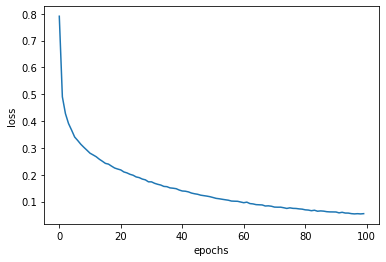

In [23]:
l = model1_log.history['loss'] 
plt.plot(l)
plt.xlabel('epochs')
plt.ylabel("loss")
plt.show()

# MNIST USING CNN

In [13]:
model3 = Sequential()
model3.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model3.add(Convolution2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer = 'Adam' ,loss = 'sparse_categorical_crossentropy',metrics = ["accuracy"])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [14]:
batch_size = 128
num_epoch = 100
#model training
model3_log = model3.fit(train_images1.reshape(-1,28,28,1),train_labels,batch_size=batch_size,epochs=num_epoch,
                       validation_data=(test_images1.reshape(-1,28,28,1),test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.5342 - accuracy: 0.8129 - val_loss: 0.3428 - val_accuracy: 0.8766
Epoch 2/100
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.3457 - accuracy: 0.8770 - val_loss: 0.2901 - val_accuracy: 0.8940
Epoch 3/100
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.2987 - accuracy: 0.8927 - val_loss: 0.2600 - val_accuracy: 0.9053
Epoch 4/100
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.2664 - accuracy: 0.9043 - val_loss: 0.2397 - val_accuracy: 0.9101
Epoch 5/100
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.2437 - accuracy: 0.9109 - val_loss: 0.2333 - val_accuracy: 0.9142
Epoch 6/100
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.2230 - accuracy: 0.9174 - val_loss: 0.2274 - val_accuracy: 0.9157
Epoch 7/100
60000/60000 [===================

60000/60000 [==============================] - 187s 3ms/sample - loss: 0.0491 - accuracy: 0.9808 - val_loss: 0.3428 - val_accuracy: 0.9320
Epoch 55/100
60000/60000 [==============================] - 188s 3ms/sample - loss: 0.0531 - accuracy: 0.9796 - val_loss: 0.3634 - val_accuracy: 0.9291
Epoch 56/100
60000/60000 [==============================] - 9294s 155ms/sample - loss: 0.0502 - accuracy: 0.9812 - val_loss: 0.3463 - val_accuracy: 0.9254
Epoch 57/100
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0510 - accuracy: 0.9805 - val_loss: 0.3485 - val_accuracy: 0.9314
Epoch 58/100
60000/60000 [==============================] - 227s 4ms/sample - loss: 0.0471 - accuracy: 0.9819 - val_loss: 0.3389 - val_accuracy: 0.9353
Epoch 59/100
60000/60000 [==============================] - 191s 3ms/sample - loss: 0.0476 - accuracy: 0.9815 - val_loss: 0.3889 - val_accuracy: 0.9320
Epoch 60/100
60000/60000 [==============================] - 197s 3ms/sample - loss: 0.0499 - accur

# VISUALIZATION

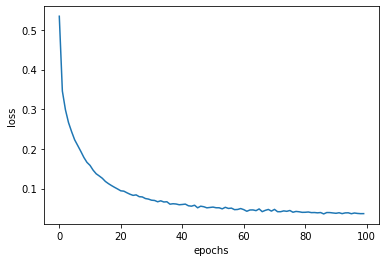

In [24]:
l = model3_log.history['loss'] 
plt.plot(l)
plt.xlabel('epochs')
plt.ylabel("loss")
plt.show()